In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file ="F:/xyz/dataset.csv"
df = pd.read_csv(file)
print(df)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       01-12-2008   Albury     13.4     22.9       0.6          NaN   
1       02-12-2008   Albury      7.4     25.1       0.0          NaN   
2       03-12-2008   Albury     12.9     25.7       0.0          NaN   
3       04-12-2008   Albury      9.2     28.0       0.0          NaN   
4       05-12-2008   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  21-06-2017    Uluru      2.8     23.4       0.0          NaN   
145456  22-06-2017    Uluru      3.6     25.3       0.0          NaN   
145457  23-06-2017    Uluru      5.4     26.9       0.0          NaN   
145458  24-06-2017    Uluru      7.8     27.0       0.0          NaN   
145459  25-06-2017    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [3]:
# Drop rows with missing values
df = df.dropna()


In [4]:
df = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], drop_first=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'Location' is the column to be encoded
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
print(df)

              Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6049    01-01-2009         4     17.9     35.2       0.0         12.0   
6050    02-01-2009         4     18.4     28.9       0.0         14.8   
6052    04-01-2009         4     19.4     37.6       0.0         10.8   
6053    05-01-2009         4     21.9     38.4       0.0         11.4   
6054    06-01-2009         4     24.2     41.0       0.0         11.2   
...            ...       ...      ...      ...       ...          ...   
142298  20-06-2017         6     19.3     33.4       0.0          6.0   
142299  21-06-2017         6     21.2     32.6       0.0          7.6   
142300  22-06-2017         6     20.7     32.8       0.0          5.6   
142301  23-06-2017         6     19.5     31.8       0.0          6.2   
142302  24-06-2017         6     20.2     31.7       0.0          5.6   

        Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  ...  \
6049        12.3           48.0           6.0          

In [6]:
x= df.iloc[:,1 :-1]

In [7]:
y = df.iloc[:, -1] 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [9]:
x=x_scaled

In [10]:
x

array([[-1.18184371,  0.69120848,  1.57529783, ..., -0.24520965,
        -0.27084717, -0.53244519],
       [-1.18184371,  0.76913098,  0.67150378, ..., -0.24520965,
        -0.27084717, -0.53244519],
       [-1.18184371,  0.92497598,  1.91960032, ..., -0.24520965,
        -0.27084717, -0.53244519],
       ...,
       [-0.90791487,  1.12757448,  1.23099533, ..., -0.24520965,
        -0.27084717, -0.53244519],
       [-0.90791487,  0.94056048,  1.08753596, ..., -0.24520965,
        -0.27084717, -0.53244519],
       [-0.90791487,  1.04965198,  1.07319002, ..., -0.24520965,
        -0.27084717, -0.53244519]])

C:\Users\Om Prakash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Om Prakash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Om Prakash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Om Prakash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

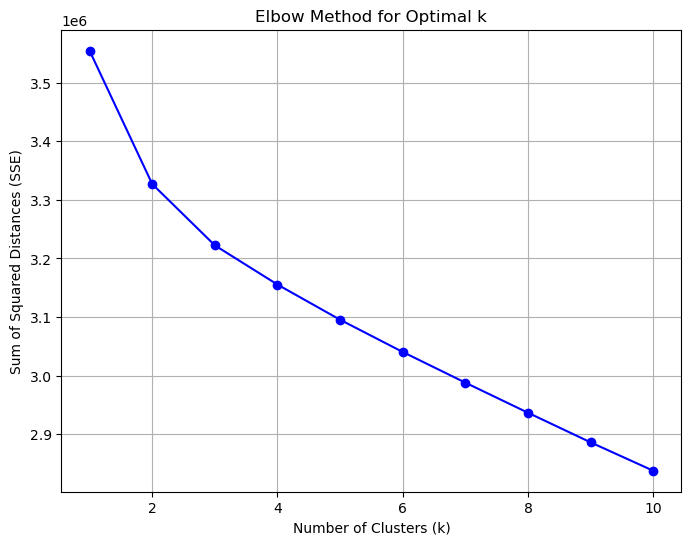

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Assuming X is your feature data
# X, _ = load_your_data_function()

# Calculate the sum of squared distances for different values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)  # Fit the model with your feature data X
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.show()
